In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plotter
import numpy as np
import seaborn as sns
import src.operations as op
df_5= pd.read_csv('datos limpios')

In [9]:
df_5

,Unnamed: 0,Entity,Year,Total_Deaths,Indoor_Deaths,Outdoor_Deaths,Outdoor_ozone_Deaths
0,0,Afghanistan,1990,299.48,250.36,46.45,5.62
1,1,Afghanistan,1991,291.28,242.58,46.03,5.60
2,2,Afghanistan,1992,278.96,232.04,44.24,5.61
3,3,Afghanistan,1993,278.79,231.65,44.44,5.66
4,4,Afghanistan,1994,287.16,238.84,45.59,5.72
...,...,...,...,...,...,...,...
6463,6463,Zimbabwe,2013,143.85,113.46,27.59,4.43
6464,6464,Zimbabwe,2014,138.20,108.70,26.76,4.30
6465,6465,Zimbabwe,2015,132.75,104.34,25.72,4.20
6466,6466,Zimbabwe,2016,128.69,100.39,25.64,4.12


In [ ]:
df_5["Year"].value_counts()

En la tabla anterior se puede observar la evolución de muertos,debido a la contaminación en el aire en los distintos paises en función de los años,tanto en el interior como en el exterior.
En esta tabla también se puede observar la evolución de las muertes en exterior,debido al contaminante ozono,a priori observando una baja proporción en comparación con las muertes totales.

In [10]:
bins = [1989,1999,2009,2019]
labels = list(range(1989,2019,10))
print("bin cuts",bins)
print("labels",labels)
df_5["Decade"] = pd.cut(df_5.Year,
                            bins=bins, 
                           labels=labels)

bin cuts [1989, 1999, 2009, 2019]
labels [1989, 1999, 2009]


In [11]:
df_6=df_5[["Entity","Decade","Total_Deaths", "Indoor_Deaths","Outdoor_Deaths","Outdoor_ozone_Deaths"]]
df_6

,Entity,Decade,Total_Deaths,Indoor_Deaths,Outdoor_Deaths,Outdoor_ozone_Deaths
0,Afghanistan,1989,299.48,250.36,46.45,5.62
1,Afghanistan,1989,291.28,242.58,46.03,5.60
2,Afghanistan,1989,278.96,232.04,44.24,5.61
3,Afghanistan,1989,278.79,231.65,44.44,5.66
4,Afghanistan,1989,287.16,238.84,45.59,5.72
...,...,...,...,...,...,...
6463,Zimbabwe,2009,143.85,113.46,27.59,4.43
6464,Zimbabwe,2009,138.20,108.70,26.76,4.30
6465,Zimbabwe,2009,132.75,104.34,25.72,4.20
6466,Zimbabwe,2009,128.69,100.39,25.64,4.12


In [30]:
df_6['Outdoor_contaminants_Deaths'] = df_6.apply(lambda x: x['Outdoor_Deaths'] - x['Outdoor_ozone_Deaths'], axis=1)
df_6

<ipython-input-30-fb585866cbb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6['Outdoor_contaminants_Deaths'] = df_6.apply(lambda x: x['Outdoor_Deaths'] - x['Outdoor_ozone_Deaths'], axis=1)


,Entity,Decade,Total_Deaths,Indoor_Deaths,Outdoor_Deaths,Outdoor_ozone_Deaths,Outdoor_contaminants_Deaths
0,Afghanistan,1989,299.48,250.36,46.45,5.62,40.83
1,Afghanistan,1989,291.28,242.58,46.03,5.60,40.43
2,Afghanistan,1989,278.96,232.04,44.24,5.61,38.63
3,Afghanistan,1989,278.79,231.65,44.44,5.66,38.78
4,Afghanistan,1989,287.16,238.84,45.59,5.72,39.87
...,...,...,...,...,...,...,...
6463,Zimbabwe,2009,143.85,113.46,27.59,4.43,23.16
6464,Zimbabwe,2009,138.20,108.70,26.76,4.30,22.46
6465,Zimbabwe,2009,132.75,104.34,25.72,4.20,21.52
6466,Zimbabwe,2009,128.69,100.39,25.64,4.12,21.52


In [21]:
df_7= df_6.groupby(["Entity","Decade"]).agg({"Total_Deaths":"sum"})
df_7

Total_Deaths
Entity      Decade              
Afghanistan 1989         2869.68
            1999         2607.92
            2009         1602.01
Albania     1989          753.73
            1999          562.12
...                          ...
Zambia      1999         1362.75
            2009          849.61
Zimbabwe    1989         1072.82
            1999         1595.45
            2009         1142.50

[693 rows x 1 columns]

In [22]:
df_8= df_6.groupby(["Entity","Decade"]).agg({"Total_Deaths":"sum"}).reset_index()
df_8

,Entity,Decade,Total_Deaths
0,Afghanistan,1989,2869.68
1,Afghanistan,1999,2607.92
2,Afghanistan,2009,1602.01
3,Albania,1989,753.73
4,Albania,1999,562.12
...,...,...,...
688,Zambia,1999,1362.75
689,Zambia,2009,849.61
690,Zimbabwe,1989,1072.82
691,Zimbabwe,1999,1595.45


In [24]:
#def entity_total(entity,year):
    #data = df_8[(df_8["Entity"]== f"{entity}") & (df_8["Decade"]== year)]
    #return data["Total_Deaths"]

In [27]:
#Entity_2 = "Albania"
#Total_Deaths=entity_total(Entity_2,1989)
#Total_Deaths

3    753.73
Name: Total_Deaths, dtype: float64

In [31]:
op.entity_total(entity_2,Decade)

AttributeError: module 'src.operations' has no attribute 'entity_total'

Con la función anterior se puede buscar el número de muertos totales en cada país y cada decada.

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


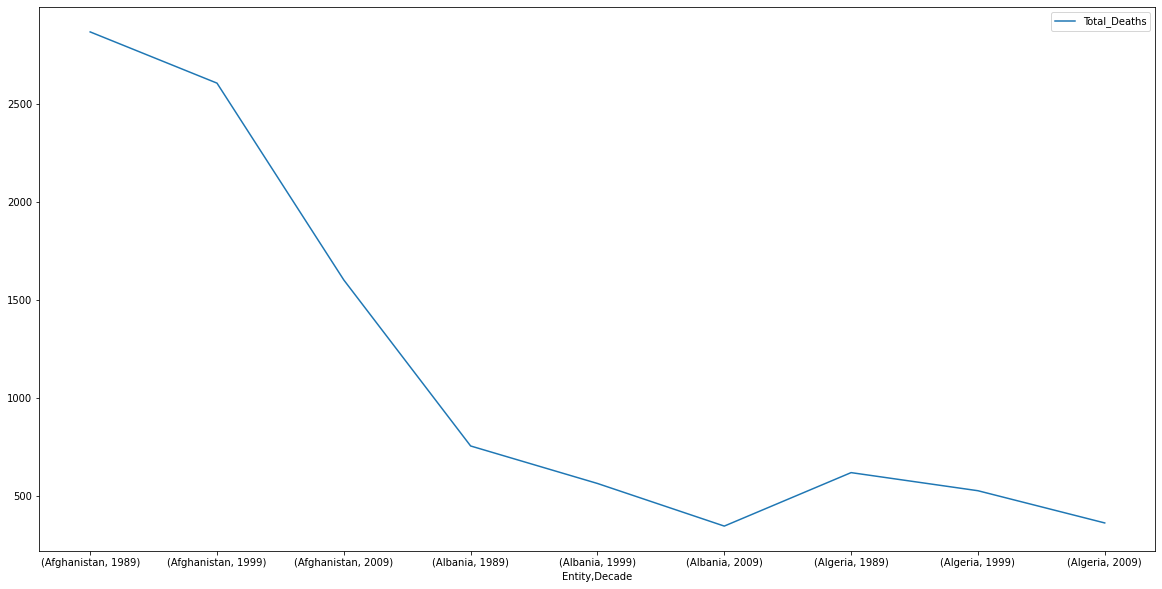

In [160]:
table = pd.pivot_table(df_8,index=['Entity','Decade'],aggfunc={'Total_Deaths':np.mean})
table_1= table.head(9)
table_1.plot(figsize=(20,10));

En el grafico anterior se puede observar como evolucionan la totalidad de muertos en la ultimas decadas de debido a la contaminación en el aire,se ve una clara disminución en la última decada analizada,seguramente debido a los protocolos instaurados.

Text(0, 0.5, 'Total de muertos')

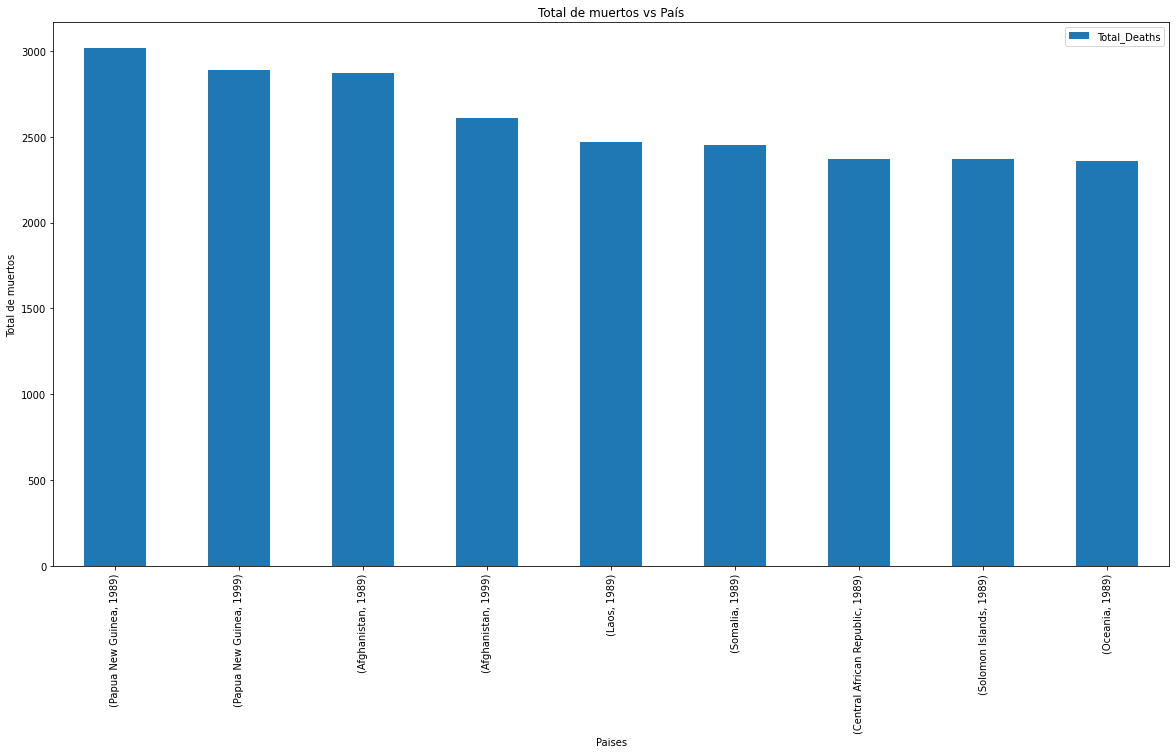

In [156]:
a = df_7.sort_values(by=['Total_Deaths'], ascending=[False])
b=a.head(9)
b.plot.bar(figsize=(20,10));
plt.title("Total de muertos vs País")
plt.xlabel("Paises")
plt.ylabel("Total de muertos")

Se puede observar,que en general en los paises mas subdesarrollados el número total de muertos es mucho mayor que en aquellos que estan más desarrollados.

A continuación una vez visto que influyen tanto la decada como el pais en el número de muertos,se va a analizar el numero total de muertos y donde fallecen mayor numero de estos,si en el interior o el exterior.Y si lo hacen en mayot proporción por ozono u otros contaminantes.

In [130]:
df_9= df_6.groupby(["Entity"]).agg({"Total_Deaths":"sum","Indoor_Deaths":"sum","Outdoor_Deaths":"sum","Outdoor_ozone_Deaths":"sum","Outdoor_contaminants_Deaths":"sum"})
df_9.sort_values(by=['Total_Deaths'], ascending=[False])
df_9

,Total_Deaths,Indoor_Deaths,Outdoor_Deaths,Outdoor_ozone_Deaths,Outdoor_contaminants_Deaths
Entity,,,,,
Afghanistan,7079.61,5711.08,1287.42,162.32,1125.10
Albania,1660.16,984.04,624.94,72.82,552.12
Algeria,1503.05,42.10,1414.63,62.53,1352.10
American Samoa,1972.77,915.81,1056.86,0.16,1056.70
Andean Latin America,1514.55,782.07,712.94,27.39,685.55
...,...,...,...,...,...
Western Sub-Saharan Africa,3663.84,2800.72,829.83,60.52,769.31
World,2442.21,1109.11,1186.31,233.31,953.00
Yemen,3739.78,2446.84,1242.33,82.48,1159.85


In [137]:
df_10= df_9[['Total_Deaths']].sum(),df_9[['Indoor_Deaths']].sum(),df_9[['Outdoor_Deaths']].sum()
df_10

(Total_Deaths    567916.55
 dtype: float64,
 Indoor_Deaths    326514.01
 dtype: float64,
 Outdoor_Deaths    227123.52
 dtype: float64)

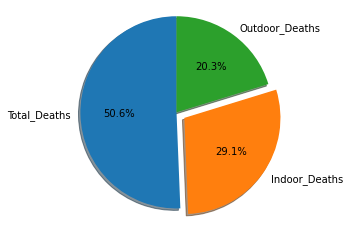

In [138]:
labels = 'Total_Deaths', 'Indoor_Deaths', 'Outdoor_Deaths'
sizes = [567916, 326514,227123]
explode = (0, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

<AxesSubplot:>

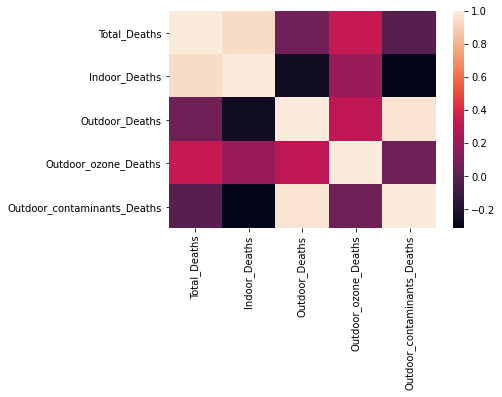

In [139]:
corr = df_9.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


El heatmap verifica lo visto anteriormente,la relación que hay entre el numero total de muertos y los muertos en estancias interiores,en este caso el efecto de los contaminantes es mayor por ser una instancia cerrada.


En el caso de la contaminación exterior puede estar producida por ozono o otros contaminantes no primarios generados artificialmente.


In [140]:
df_11= df_9[['Outdoor_Deaths']].sum(),df_9[['Outdoor_ozone_Deaths']].sum(),df_9[['Outdoor_contaminants_Deaths']].sum()
df_11

(Outdoor_Deaths    227123.52
 dtype: float64,
 Outdoor_ozone_Deaths    21802.05
 dtype: float64,
 Outdoor_contaminants_Deaths    205321.47
 dtype: float64)

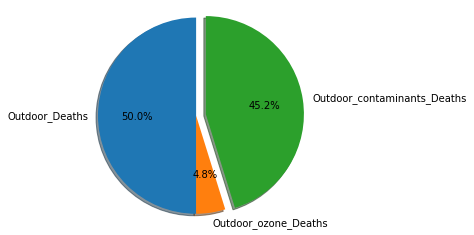

In [142]:
labels = 'Outdoor_Deaths', 'Outdoor_ozone_Deaths', 'Outdoor_contaminants_Deaths'
sizes = [227123, 21802,205321]
explode = (0, 0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()